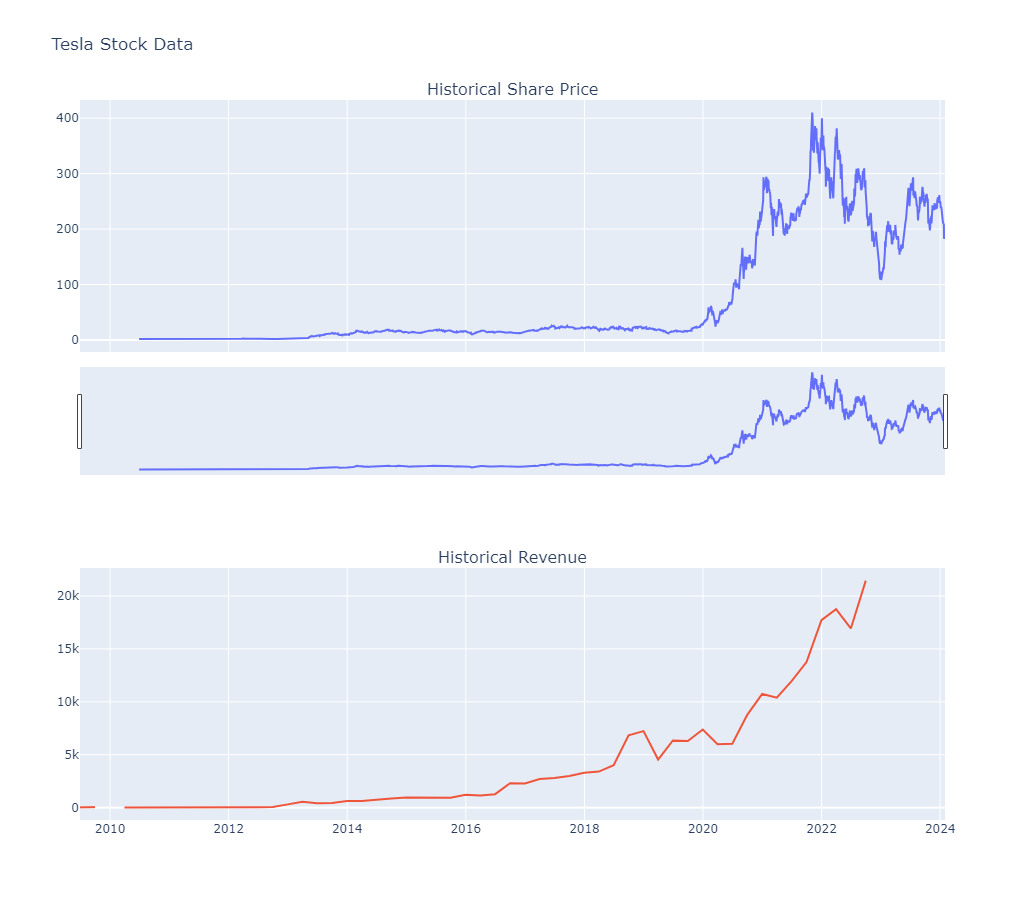

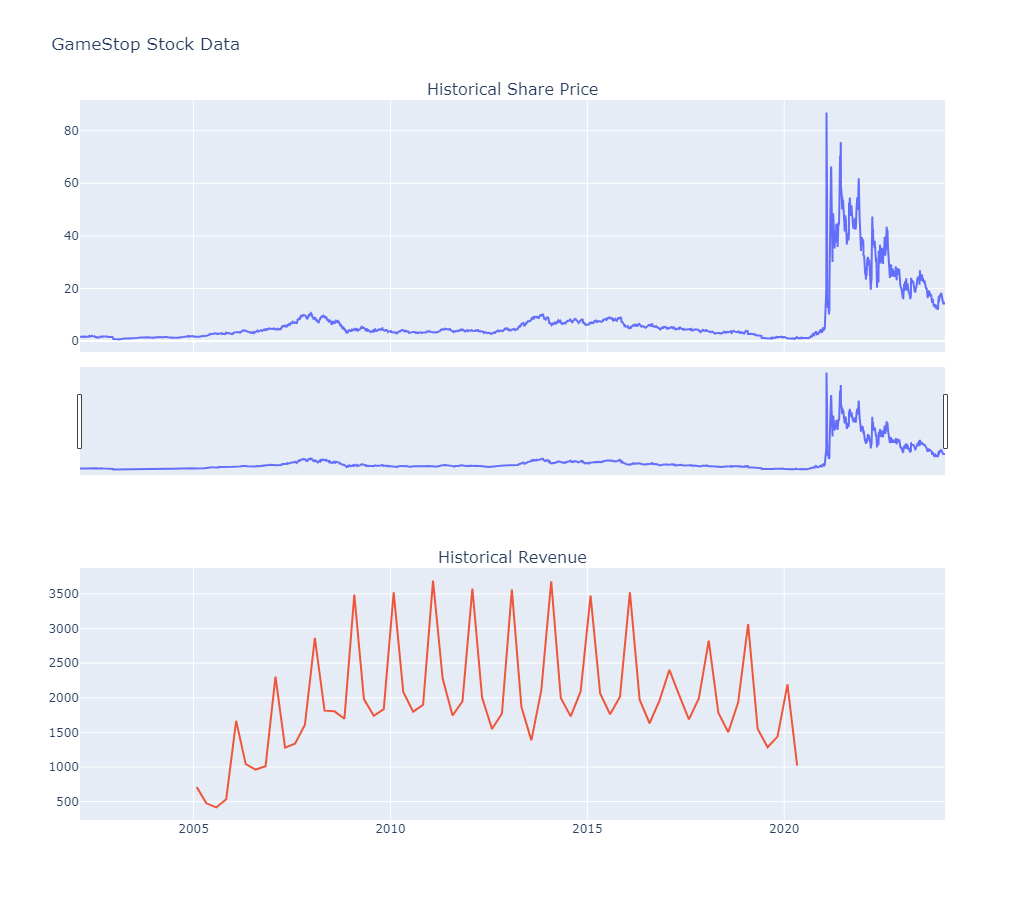

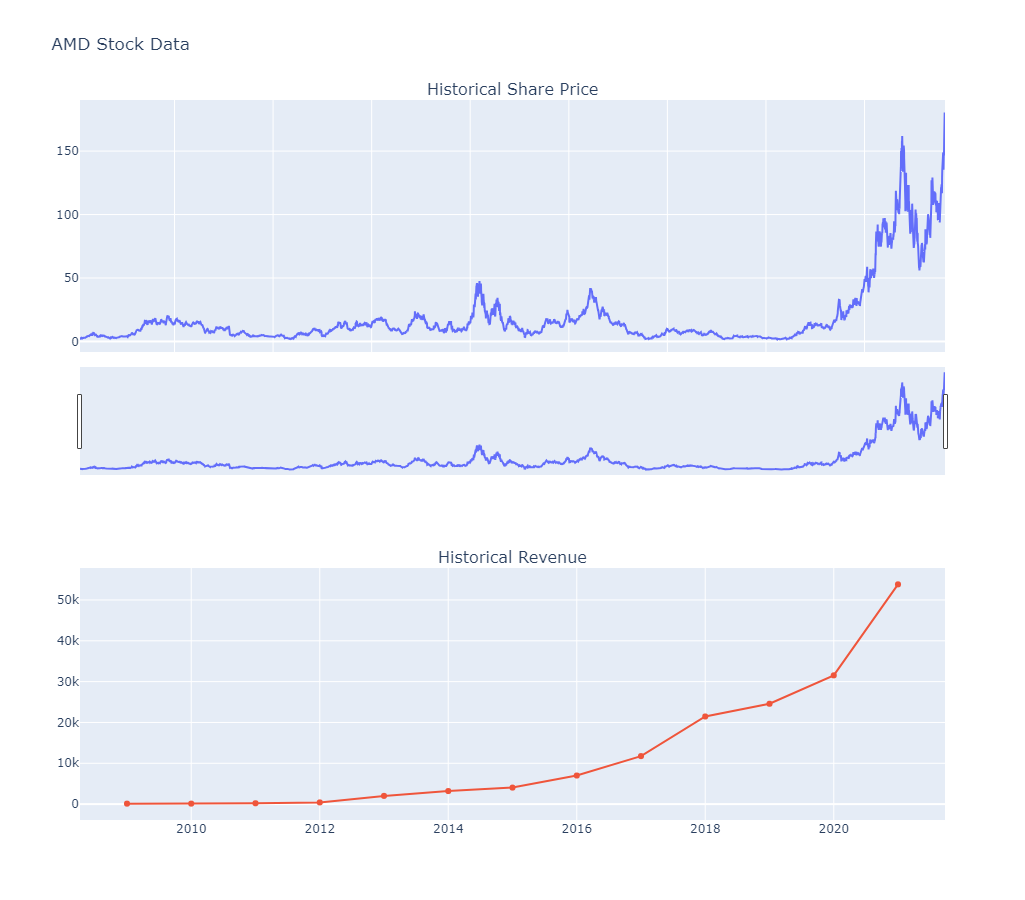

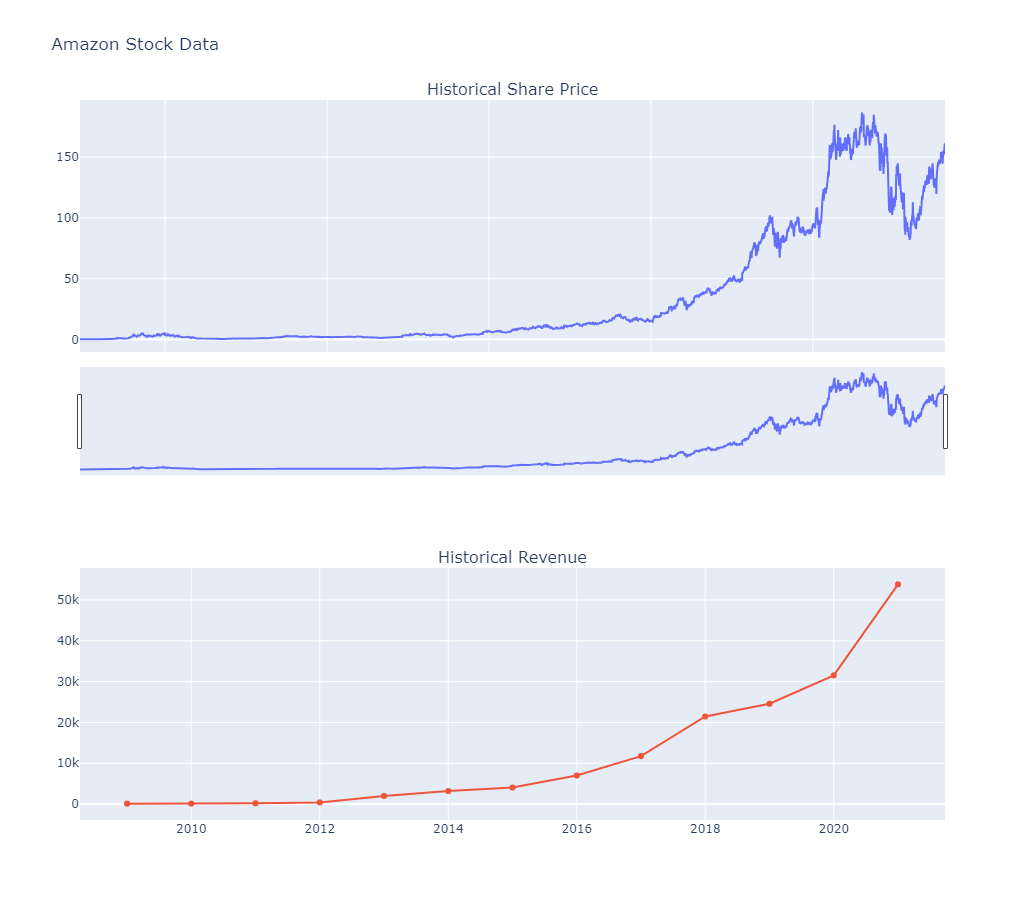

In [15]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Function to extract data using yfinance and return formatted DataFrame
def extract_data(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(period="max")
    data.reset_index(inplace=True)
    return data

# Function to scrape revenue data from given URL and return formatted DataFrame
def scrape_revenue_data(url, table_index):
    tables = pd.read_html(requests.get(url).text)
    revenue_data = tables[table_index]
    revenue_data.columns = ["Date", "Revenue"]
    revenue_data["Revenue"] = revenue_data["Revenue"].str.replace(r'[,\\$]', "", regex=True).astype(float)
    return revenue_data

# Function to create the visualization
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=0.3)
    
    # Add Share Price Data
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name="Share Price"), row=1, col=1)
    
    # Add Revenue Data
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], name="Revenue"), row=2, col=1)
    
    # Update layout
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

# URLs for revenue data
tesla_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
gamestop_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
amd_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
amazon_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Extract and visualize data
tesla_data = extract_data("TSLA")
tesla_revenue = scrape_revenue_data(tesla_url, 1)
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')

gamestop_data = extract_data("GME")
gme_revenue = scrape_revenue_data(gamestop_url, 1)
make_graph(gamestop_data, gme_revenue, 'GameStop Stock Data')

amd_data = extract_data("AMD")
amd_revenue = scrape_revenue_data(amd_url, 0)
make_graph(amd_data, amd_revenue, 'AMD Stock Data')

amazon_data = extract_data("AMZN")
amazon_revenue = scrape_revenue_data(amazon_url, 0)
make_graph(amazon_data, amazon_revenue, 'Amazon Stock Data')


In [14]:
amazon_data['Open'].iloc[-1]

157.0